In [3]:
!pip install opencv-python imutils


In [1]:
from collections import deque # import deque a far faster list
import numpy as np # import numpy as needed
import imutils # we definately need imutils convienience functions.
import time # time is time
import cv2 # The major library, opencv

In [2]:
lower_color_boundary = (110, 50, 50) # define the lower boundary of the colour of the object in HSV
upper_color_boundary = (170, 255, 255)# define the upper region of the colour of the object in HSV
points        = deque(maxlen = 64) # the Deque with a maximum hold size of 64 contents.

print("Booting the Video stream,")
vs = cv2.VideoCapture("video_file.mp4")#start the video stream.
time.sleep(2.0) #set sleep time to 2.0 seconds

Booting the Video stream,


In [3]:
while True:
    frame = vs.read() #Read off the frame from the video stream
    ret,frame  = frame # Use this if you want to load in your video
    if frame is None: # If there is no frame, save my pc from going through any stress at all
        break
    # otherwise, if we have a frame, we proceed with the following code
    frame = imutils.resize(frame, width = 700) # so much easier than open cv, keeping aspect ratio intact
    frame = cv2.flip(frame,1) # i want the mirror view, it's very helpful especially if i'm streaming
    
    #processing the frame 
    blurred = cv2.GaussianBlur(frame, (11,11),0) # blurr helps to reduce high frequency noise, definately helps model
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV) # convert my color to the HSV format
    
    # Create a mask
    mask = cv2.inRange(hsv, lower_color_boundary, upper_color_boundary) # mask other regions except colors in range of upper to lower (thresholding)
    mask = cv2.erode(mask, None, iterations =2) # Reduce noise caused by thresholding
    mask = cv2.dilate(mask, None, iterations =2) # foreground the found object i.e futher reduce noise.
    
    
    contours = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # find contours
    contours = imutils.grab_contours(contours) # Grab the contours using imutils
    center = None # center is initially set to none
    if len(contours) > 0: # if the contours list is not empty proceed
        contour = max(contours, key = cv2.contourArea) # select contour with maximum Area, most likely our object
        ((x,y), radius) = cv2.minEnclosingCircle(contour) # pick up co-ordinates for drawing a circle around the object
        M = cv2.moments(contour) # Extract moments from the contour.
        center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])) # Obtain the centre of mass of the object.
        if radius > 10: # if we have a reasonable radius for the proposed object detected
            cv2.circle(frame, (int(x), int(y)), int(radius), (0,255,255), 2) # Draw a circle to bound the Object
            cv2.circle(frame, center, 5, (0,0,225), -1) # Draw a filled in dot at the centre of the circle

    points.appendleft(center) # Tell my deque to keep the position of the centre of that frame.
    
    
    # Speedily draw all the in the deque.
    
    for i in range (1, len(points)): #for all the points in the deque
        if points[i-1] is None or points[i] is None: # if we have none as the current point or previous
            continue # Start the while loop all over again.
        thickness = int(np.sqrt(64 / float(i+1)) * 2.5) # let's make thickness vary with point in deque
        cv2.line(frame, points[i-1], points[i], (0,0,225), thickness) #draw a line between all 64 points in the deque
    cv2.imshow("Frame by Frame makes Video", frame) # let's see the frame X frame
    
    
    # Closing a video frame
    key = cv2.waitKey(1) #wait for the cv key
    if key == ord("x"): # If the x button is pressed
        break # Break from the loopx
vs.release() # Let opencv release the video loader
cv2.destroyAllWindows() # Destroy all windows to close it


2025-03-27 14:22:49.189 python[23880:1291249] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-27 14:22:49.189 python[23880:1291249] +[IMKInputSession subclass]: chose IMKInputSession_Modern


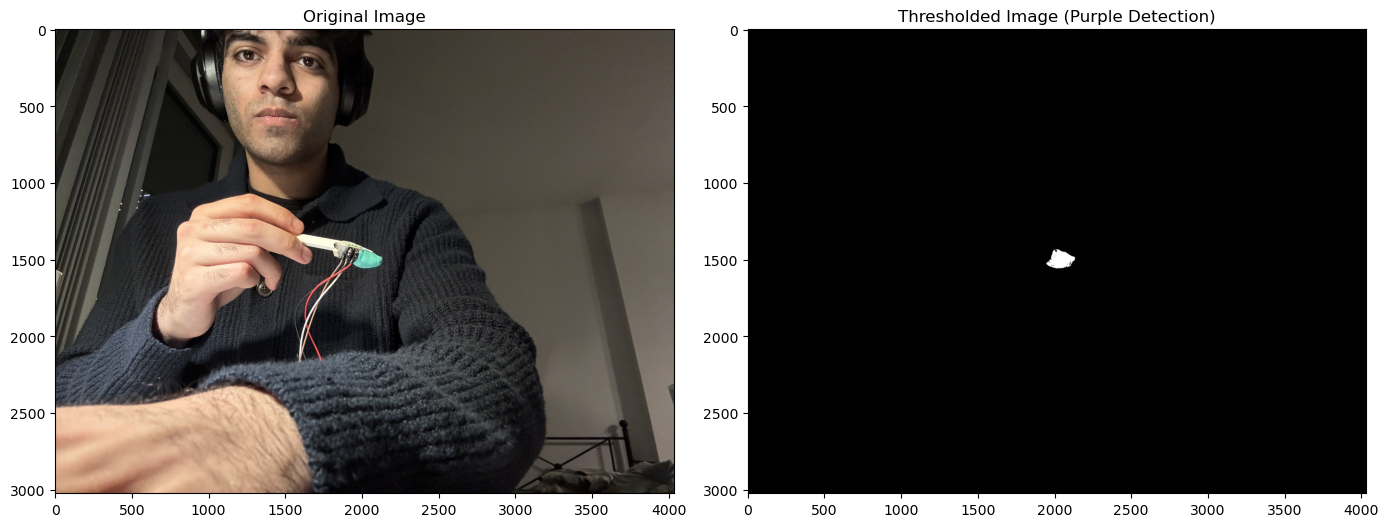

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image of interest
img = cv2.imread('frame1.jpg')

# Convert from BGR (OpenCV format) to RGB (Matplotlib format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define color range for purple
PURPLE_MIN = np.array([75, 30, 180], np.uint8)  # Lower bound for purple (wider hue)
PURPLE_MAX = np.array([100, 200, 255], np.uint8)  # Upper bound for purple

# Convert the image color format to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Threshold the image to isolate the purple color
frame_threshed = cv2.inRange(hsv_img, PURPLE_MIN, PURPLE_MAX)

# Set up the figure for displaying the images
plt.figure(figsize=(14, 7))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('on')  # Show the axis values

# Show the thresholded image
plt.subplot(1, 2, 2)
plt.imshow(frame_threshed, cmap='gray')  # Use grayscale colormap for binary image
plt.title('Thresholded Image (Purple Detection)')
plt.axis('on')

plt.tight_layout()
plt.savefig('purple_detection_comparison.png', dpi=300)  # Save the figure as an image file
plt.show()

# Save the thresholded image as a file (optional)
cv2.imwrite('thresholded_purple_pen.jpg', frame_threshed)